In [1]:
import os
import pandas as pd
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
import time


import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, roc_auc_score,f1_score
from gurobipy import GRB

license_path = os.path.join("gurobi.lic")
os.environ["GRB_LICENSE_FILE"] = license_path
env = gp.Env(empty=True)
env.setParam('OutputFlag', 0)
env.start()

<gurobipy.Env, Parameter changes: OutputFlag=0>

In [2]:
data = pd.read_csv(os.path.join("data", "diabetes.csv"))
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 改變 n_estimiators

100%|██████████| 29/29 [00:02<00:00, 10.05it/s]


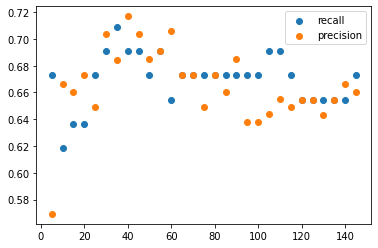

In [4]:
recalls = list()
precisions = list()
accuracies = list()
time_cost = list()
n_estimators_space = list(range(5, 150, 5)) #5到150 每5個一個點
for n_estimators in tqdm.tqdm(n_estimators_space):
    start = time.process_time()
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=880203)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    end = time.process_time()
    # print(confusion_matrix(y_test, y_pred))
    # print("accuracy_score", accuracy_score(y_test, y_pred))
    # print("precision_score", precision_score(y_test, y_pred))
    # print("recall_score", recall_score(y_test, y_pred))
    # print("roc_auc_score", roc_auc_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    time_cost.append(end - start)
    

plt.scatter(n_estimators_space, recalls, label="recall")
plt.scatter(n_estimators_space, precisions, label="precision")
plt.legend()

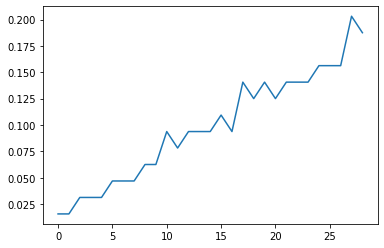

In [5]:
plt.plot(time_cost)

# compute time 隨著n_estimators 越高 時間越多

### 改變 max_depth

100%|██████████| 27/27 [00:03<00:00,  7.69it/s]


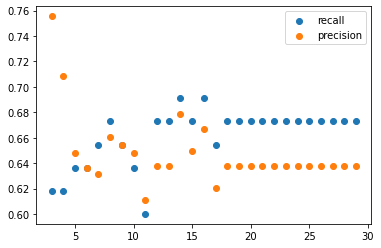

In [6]:
recalls = list()
precisions = list()
accuracies = list()
time_cost = list()

max_depth_space = list(range(3, 30, 1))
for max_depth in tqdm.tqdm(max_depth_space):
    start = time.perf_counter()
    clf = RandomForestClassifier(max_depth=max_depth, random_state=880203)
    clf.fit(X_train, y_train)
    end = time.perf_counter()

    y_pred = clf.predict(X_test)

    # print(confusion_matrix(y_test, y_pred))
    # print("accuracy_score", accuracy_score(y_test, y_pred))
    # print("precision_score", precision_score(y_test, y_pred))
    # print("recall_score", recall_score(y_test, y_pred))
    # print("roc_auc_score", roc_auc_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    time_cost.append(end - start)

plt.scatter(max_depth_space, recalls, label="recall")
plt.scatter(max_depth_space, precisions, label="precision")
plt.legend()


"""
max_depth=14 Presision recall都有相對較好
表現出 不是單一評估指標 能夠決定model好跟壞
"""

100%|██████████| 28/28 [00:03<00:00,  8.77it/s]


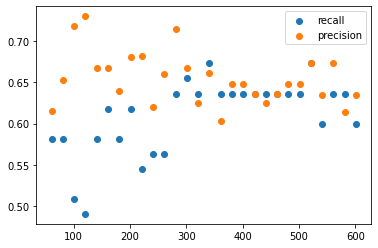

In [9]:
recalls = list()
precisions = list()
accuracies = list()

train_size_space = list(range(X_train.shape[0] // 10, X_train.shape[0], 20))
for data_size in tqdm.tqdm(train_size_space):
    clf = RandomForestClassifier(random_state=880203)
    clf.fit(X_train[:data_size], y_train[:data_size])
    y_pred = clf.predict(X_test)

    # print(confusion_matrix(y_test, y_pred))
    # print("accuracy_score", accuracy_score(y_test, y_pred))
    # print("precision_score", precision_score(y_test, y_pred))
    # print("recall_score", recall_score(y_test, y_pred))
    # print("roc_auc_score", roc_auc_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

plt.scatter(train_size_space, recalls, label="recall")
plt.scatter(train_size_space, precisions, label="precision")
plt.legend()

"""
training data size
"""

In [10]:
class DMU:
    def __init__(self, n_estimators, max_depth, train_size, precision, recall):
        self.inputs = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "train_size": train_size
        }
        self.outputs = {
            "precision": precision,
            "recall": recall
        }
        self.model = None
        # self.n_estimators = n_estimators
        # self.max_depth = max_depth
        # self.train_size = train_size
        # self.precision = precision
        # self.recall = recall


In [11]:
DMUs = list()
n_estimators_space = list(range(5, 60, 5))
max_depth_space = list(range(3, 16, 1))
train_size_space = list(range(X_train.shape[0] // 10, 410, 20))

verbose = False

# roc_auc_estimators = list()
# recall_estimators = list()
# precision_estimators = list()
# f1_score_estimators = list()

hyper_to_metrics_dict = dict()

for n_estimators in tqdm.tqdm(n_estimators_space):
    for max_depth in max_depth_space:
        for train_size in train_size_space:
            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=880203)
            clf.fit(X_train[:train_size],y_train[:train_size])

            y_pred = clf.predict(X_test)
            if verbose:
                print(confusion_matrix(y_test, y_pred))
                print("acc_score", accuracy_score(y_test, y_pred))
                print("precision", precision_score(y_test, y_pred))
                print("recall", recall_score(y_test, y_pred))
                print('roc_auc_score', roc_auc_score(y_test, y_pred))
            
            _ = DMU(n_estimators, max_depth, train_size, precision_score(y_test, y_pred), recall_score(y_test, y_pred))
            DMUs.append(_)
            # hyper_to_metrics_dict[(n_estimators, max_depth, train_size)] = (roc_auc_score(y_test, y_pred), 
            #                              (recall_score(y_test, y_pred) * 10)**2, 
            #                              (precision_score(y_test, y_pred) * 10)**2, 
            #                              f1_score(y_test, y_pred))

100%|██████████| 11/11 [01:26<00:00,  7.84s/it]


In [12]:
len(DMUs)

2574

In [13]:
K = range(len(DMUs))
I = ["n_estimators", "max_depth", "train_size"]
J = ["precision", "recall"]


# VRS_models = dict()
for r in tqdm.tqdm(K):
    m = gp.Model(f"VRS-{r}", env=env)
    theta = m.addVar(vtype=GRB.CONTINUOUS, lb=0)
    lambda_ = m.addVars(K, vtype=GRB.CONTINUOUS, lb=0)
    m.setObjective(theta)
    for i in I:
        m.addConstr(
            gp.quicksum(lambda_[k] * DMUs[k].inputs[i] for k in K) <= theta * DMUs[r].inputs[i]
        )
    for j in J:
        m.addConstr(
            gp.quicksum(lambda_[k] * DMUs[k].outputs[j] for k in K) >= DMUs[r].outputs[j]
        )
    m.addConstr(
        gp.quicksum(lambda_[k] for k in K) == 1
    )
    m.optimize()
    # print(m.ObjVal, end='\t')
    DMUs[r].model = m
    # VRS_models[r] = m

100%|██████████| 2574/2574 [01:02<00:00, 41.16it/s]


In [15]:
print("TE:")
for dmu in DMUs:
    print(f"{dmu.inputs}:", dmu.model.ObjVal)

TE:
{'n_estimators': 5, 'max_depth': 3, 'train_size': 61}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 81}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 101}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 121}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 141}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 161}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 181}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 201}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 221}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 241}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 261}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 281}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 301}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 321}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 341}: 1.0
{'n_estimators': 5, 'max_depth': 3, 'train_size': 361}: 1.0
{'n_estimators': 5, 'max_depth': 3, 't

In [16]:
efficient_dmus = [dmu for dmu in DMUs if dmu.model.ObjVal > 0.999]

In [17]:
len(efficient_dmus)

546

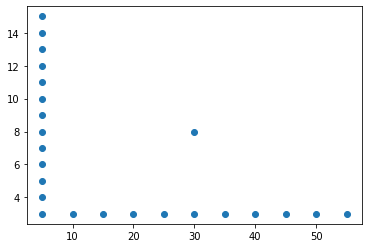

In [18]:
train_size = 361
plt.scatter([dmu.inputs["n_estimators"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size], [dmu.inputs["max_depth"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size])

"""
固定 train_size plot剩下兩個
"""

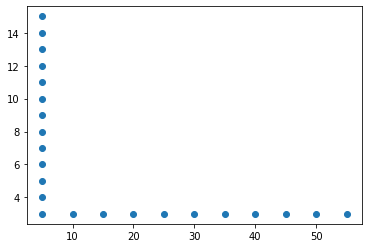

In [19]:
train_size = 341
plt.scatter([dmu.inputs["n_estimators"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size], [dmu.inputs["max_depth"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size])

In [20]:
train_size = 341

for dmu in efficient_dmus:
    if not dmu.inputs["train_size"] == train_size:
        continue
    print(dmu.outputs["recall"], dmu.outputs["precision"])

0.5454545454545454 0.7142857142857143
0.6181818181818182 0.6296296296296297
0.6 0.5689655172413793
0.5454545454545454 0.6382978723404256
0.5272727272727272 0.5918367346938775
0.6 0.6
0.5454545454545454 0.6122448979591837
0.5454545454545454 0.5882352941176471
0.6 0.5789473684210527
0.6363636363636364 0.5645161290322581
0.6181818181818182 0.5666666666666667
0.6181818181818182 0.5666666666666667
0.6181818181818182 0.5666666666666667
0.6181818181818182 0.723404255319149
0.5636363636363636 0.7209302325581395
0.5636363636363636 0.775
0.5636363636363636 0.775
0.5818181818181818 0.7441860465116279
0.5818181818181818 0.7272727272727273
0.5636363636363636 0.7380952380952381
0.5454545454545454 0.7317073170731707
0.5454545454545454 0.7142857142857143
0.5818181818181818 0.7111111111111111


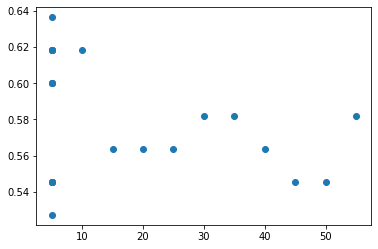

In [21]:
train_size = 341
plt.scatter([dmu.inputs["n_estimators"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size], [dmu.outputs["recall"] for dmu in efficient_dmus if dmu.inputs["train_size"] == train_size])

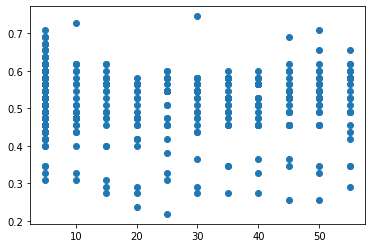

In [22]:
train_size = 341
plt.scatter([dmu.inputs["n_estimators"] for dmu in efficient_dmus], [dmu.outputs["recall"] for dmu in efficient_dmus])

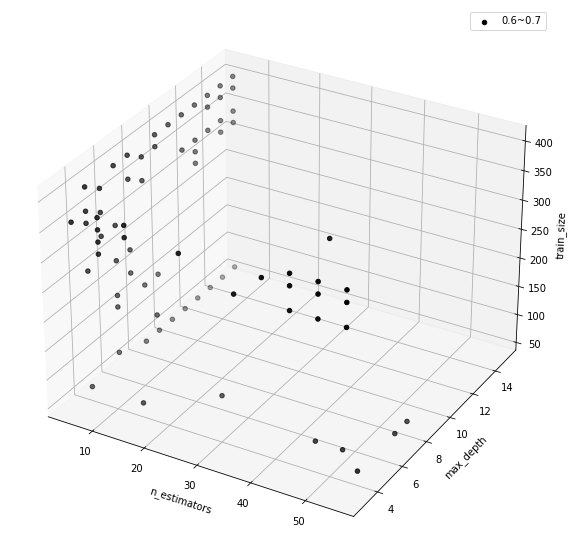

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# xs = [dmu.inputs["n_estimators"] for dmu in efficient_dmus]
# ys = [dmu.inputs["max_depth"] for dmu in efficient_dmus]
# zs = [dmu.inputs["train_size"] for dmu in efficient_dmus]
# ax.scatter(xs, ys, zs, marker='o')


bins = [('b', 0.0, 0.1), ('g', 0.1, 0.2), ('#FF9D6F', 0.2, 0.3), ('c', 0.3, 0.4), 
        ('m', 0.4, 0.5), ('y', 0.5, 0.6), ('k', 0.6, 0.7), ('r', 0.7, 0.8)]#, ('b', 0.8, 0.9), ('g', 0.9, 1.0)]
for c, recall_lb, recall_ub in bins:
    xs = [dmu.inputs["n_estimators"] for dmu in efficient_dmus if (dmu.outputs["recall"] <= recall_ub and dmu.outputs["recall"] >= recall_lb)]
    ys = [dmu.inputs["max_depth"] for dmu in efficient_dmus if (dmu.outputs["recall"] <= recall_ub and dmu.outputs["recall"] >= recall_lb)]
    zs = [dmu.inputs["train_size"] for dmu in efficient_dmus if (dmu.outputs["recall"] <= recall_ub and dmu.outputs["recall"] >= recall_lb)]
    if recall_lb==0.6:
        ax.scatter(xs, ys, zs, marker='o', color=c, label=f"{recall_lb}~{recall_ub}")

ax.legend()
# for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('train_size')


plt.show()

In [34]:
dmu

(array([  4.,  13.,  16.,  16.,  91., 129., 195.,  65.,  13.,   4.]),
 array([0.21818182, 0.27090909, 0.32363636, 0.37636364, 0.42909091,
        0.48181818, 0.53454545, 0.58727273, 0.64      , 0.69272727,
        0.74545455]),
 <BarContainer object of 10 artists>)

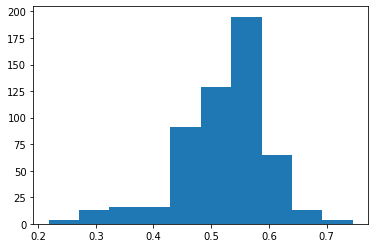

In [106]:
plt.hist([dmu.outputs["recall"] for dmu in efficient_dmus])

In [102]:
estimator = [dmu.inputs["n_estimators"] for dmu in efficient_dmus if (dmu.outputs["recall"] > 0.6 and dmu.outputs["recall"] < 0.7)]
depth = [dmu.inputs["max_depth"] for dmu in efficient_dmus if (dmu.outputs["recall"] > 0.6 and dmu.outputs["recall"] < 0.7)]
dataSize = [dmu.inputs["train_size"] for dmu in efficient_dmus if (dmu.outputs["recall"] > 0.6 and dmu.outputs["recall"] < 0.7)]

(36, 3)


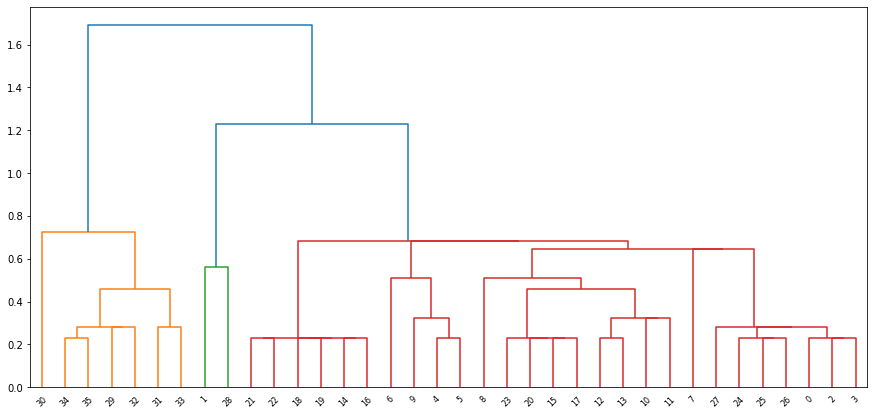

In [103]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

dataPoint = np.array([estimator, depth, dataSize]).T
scaler = StandardScaler()
dataPoint_std = scaler.fit_transform(dataPoint)
print(dataPoint_std.shape)

linked = linkage(dataPoint_std, 'single')


plt.figure(figsize=(15, 7))
dendrogram(linked)
plt.show()

In [104]:
linked

array([[25.        , 26.        ,  0.22814531,  2.        ],
       [18.        , 19.        ,  0.22814531,  2.        ],
       [21.        , 22.        ,  0.22814531,  2.        ],
       [34.        , 35.        ,  0.22814531,  2.        ],
       [ 2.        ,  3.        ,  0.22814531,  2.        ],
       [24.        , 36.        ,  0.22814531,  3.        ],
       [ 4.        ,  5.        ,  0.22814531,  2.        ],
       [ 0.        , 40.        ,  0.22847589,  3.        ],
       [15.        , 17.        ,  0.22847589,  2.        ],
       [20.        , 44.        ,  0.22847589,  3.        ],
       [23.        , 45.        ,  0.22847589,  4.        ],
       [14.        , 16.        ,  0.22847589,  2.        ],
       [37.        , 47.        ,  0.22847589,  4.        ],
       [38.        , 48.        ,  0.22847589,  6.        ],
       [12.        , 13.        ,  0.22847589,  2.        ],
       [29.        , 32.        ,  0.27945628,  2.        ],
       [41.        , 43.

In [127]:
cluster1 = [i for i in range(29, 36)]
cluster2 = [1,28]
cluster3 = [i for i in range(2,28)]
cluster3.append(0)

In [113]:

def clusterMinMax(X, cluster):
    c1_List_estimator = []
    c1_List_depth = []
    c1_List_trainSize = []
    for i in cluster:
        c1_List_estimator.append(X[i][0])
        c1_List_depth.append(X[i][1])
        c1_List_trainSize.append(X[i][2])
    c1_estimator_min = np.array(c1_List_estimator).min()
    c1_estimator_max = np.array(c1_List_estimator).max()
    c1_depth_min = np.array(c1_List_depth).min()
    c1_depth_max = np.array(c1_List_depth).max()
    c1_trainSize_min = np.array(c1_List_trainSize).min()
    c1_trainSize_max = np.array(c1_List_trainSize).max()

    return [c1_estimator_min, c1_estimator_max], [c1_depth_min, c1_depth_max], [c1_trainSize_min, c1_trainSize_max]


c1_estimator, c1_depth, c1_trainSize = clusterMinMax(dataPoint, cluster1)
c2_estimator, c2_depth, c2_trainSize = clusterMinMax(dataPoint, cluster2)
c3_estimator, c3_depth, c3_trainSize = clusterMinMax(dataPoint, cluster3)

In [124]:
recalls = list()
precisions = list()
accuracies = list()
time_cost = list()

max_recall=0
modelCount=0

#cluster1
bestHyperparameterDic={"n_estimators":0, "max_depth":0, "data_size":0}
for n_estimators in range(c1_estimator[0], c1_estimator[1], 2):
    for max_depth in range(c1_depth[0], c2_depth[1]):
        for data_size in range(c1_trainSize[0], c1_trainSize[1], 10):
            start = time.process_time()
            clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state = 880203)
            clf.fit(X_train[:data_size], y_train[:data_size])
            y_pred = clf.predict(X_test)
            end = time.process_time()


            if recall_score(y_test, y_pred) > max_recall:
                max_recall=recall_score(y_test, y_pred)
                bestHyperparameterDic["n_estimators"] = n_estimators
                bestHyperparameterDic["max_depth"] = max_depth
                bestHyperparameterDic["data_size"] = data_size

            recalls.append(recall_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            time_cost.append(end - start)
            modelCount+=1
        

#cluster2
for n_estimators in range(c2_estimator[0], c2_estimator[1], 2):
    for max_depth in range(c2_depth[0], c2_depth[1]):
        for data_size in range(c2_trainSize[0], c2_trainSize[1], 10):
            start = time.process_time()
            clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state = 880203)
            clf.fit(X_train[:data_size], y_train[:data_size])
            y_pred = clf.predict(X_test)
            end = time.process_time()



            if recall_score(y_test, y_pred) > max_recall:
                max_recall=recall_score(y_test, y_pred)
                bestHyperparameterDic["n_estimators"] = n_estimators
                bestHyperparameterDic["max_depth"] = max_depth
                bestHyperparameterDic["data_size"] = data_size

            recalls.append(recall_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            time_cost.append(end - start)
            modelCount+=1
        


for n_estimators in range(c3_estimator[0], c3_estimator[1], 2):
    for max_depth in range(c3_depth[0], c3_depth[1]):
        for data_size in range(c3_trainSize[0], c3_trainSize[1], 10):

            start = time.process_time()
            clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state = 880203)
            clf.fit(X_train[:data_size], y_train[:data_size])
            y_pred = clf.predict(X_test)
            end = time.process_time()

            if recall_score(y_test, y_pred) > max_recall:
                max_recall=recall_score(y_test, y_pred)
                bestHyperparameterDic["n_estimators"] = n_estimators
                bestHyperparameterDic["max_depth"] = max_depth
                bestHyperparameterDic["data_size"] = data_size

            recalls.append(recall_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            time_cost.append(end - start)
            modelCount+=1
        

"""plt.scatter(n_estimators_space, recalls, label="recall")
plt.scatter(n_estimators_space, precisions, label="precision")
plt.legend()"""

'plt.scatter(n_estimators_space, recalls, label="recall")\nplt.scatter(n_estimators_space, precisions, label="precision")\nplt.legend()'

In [125]:
print("total model: ", modelCount)
print("Best Recall: ", max_recall)
print(bestHyperparameterDic)

total model:  1470
Best Recall:  0.7272727272727273
{'n_estimators': 11, 'max_depth': 8, 'data_size': 361}


BaseLine

In [132]:
#cluster2
recalls = list()
precisions = list()
accuracies = list()
time_cost = list()

max_recall_gridSearch=0
modelCount_gridSearch=0

#cluster1
bestHyperparameterDic_gridSearch={"n_estimators":0, "max_depth":0, "data_size":0}


for n_estimators in tqdm.tqdm(range(5, 150, 2)):
    for max_depth in range(3, 30):
        for data_size in range(X_train.shape[0] // 10, X_train.shape[0], 10):
            start = time.process_time()
            clf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, random_state = 880203)
            clf.fit(X_train[:data_size], y_train[:data_size])
            y_pred = clf.predict(X_test)
            end = time.process_time()



            if recall_score(y_test, y_pred) > max_recall_gridSearch:
                max_recall_gridSearch=recall_score(y_test, y_pred)
                bestHyperparameterDic_gridSearch["n_estimators"] = n_estimators
                bestHyperparameterDic_gridSearch["max_depth"] = max_depth
                bestHyperparameterDic_gridSearch["data_size"] = data_size

            recalls.append(recall_score(y_test, y_pred))
            precisions.append(precision_score(y_test, y_pred))
            accuracies.append(accuracy_score(y_test, y_pred))
            time_cost.append(end - start)
            modelCount_gridSearch+=1
        

 82%|████████▏ | 60/73 [1:48:59<42:43, 197.21s/it]  

In [ ]:
print("total model: ", modelCount_gridSearch)
print("Best Recall: ", max_recall_gridSearch)
print(bestHyperparameterDic_gridSearch)